In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [46]:
#Load Dataset
df=pd.read_csv("E:\elevvo pathsway Internship\Level 2\Loan Approval\Dataset\Loan Approval\loan_approval_dataset.csv")

In [47]:
print("Dataset Shape:", df.shape)
print("\nOriginal columns:")
print(df.columns.tolist())

Dataset Shape: (4269, 13)

Original columns:
['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [48]:
# Fix the column name issue (remove space before 'loan_status')
df.columns = df.columns.str.strip()
print("\nFixed column names:")
print(df.columns.tolist())



Fixed column names:
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [55]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [58]:
# Basic data information
print("\nDataset Info:")
print(df.info())

print("\nTarget variable distribution:")
print(df['loan_status'].value_counts())
print(f"Approval rate: {(df['loan_status'] == ' Approved').mean()*100:.1f}%")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None

Target va

In [60]:
# Statistical summary for numerical features
numerical_features = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 
                     'cibil_score', 'residential_assets_value', 'commercial_assets_value', 
                     'luxury_assets_value', 'bank_asset_value']

print("\nStatistical Summary for Numerical Features:")
df[numerical_features].describe()



Statistical Summary for Numerical Features:


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


Text(0.5, 1.0, 'Loan Status Distribution')

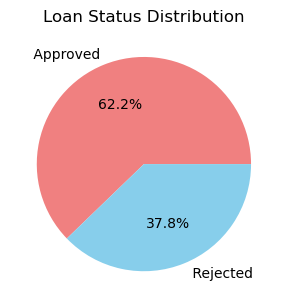

In [61]:
# Data Visualization and Analysis
plt.figure(figsize=(20, 16))

# 1. Target variable distribution
plt.subplot(4, 4, 1)
counts = df['loan_status'].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Loan Status Distribution')

(array([0, 1]), [Text(0, 0, ' Approved'), Text(1, 0, ' Rejected')])

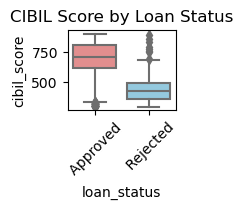

In [62]:
# 2. CIBIL Score distribution by loan status
plt.subplot(4, 4, 2)
sns.boxplot(data=df, x='loan_status', y='cibil_score', palette=['lightcoral', 'skyblue'])
plt.title('CIBIL Score by Loan Status')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, ' Approved'), Text(1, 0, ' Rejected')])

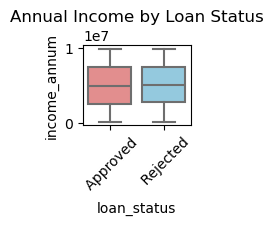

In [65]:
# 3. Income distribution by loan status
plt.subplot(4, 4, 3)
sns.boxplot(data=df, x='loan_status', y='income_annum', palette=['lightcoral', 'skyblue'])
plt.title('Annual Income by Loan Status')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, ' Approved'), Text(1, 0, ' Rejected')])

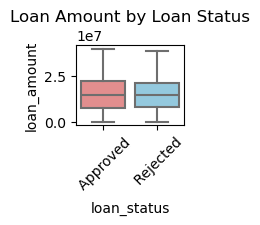

In [67]:
# 4. Loan amount distribution by loan status
plt.subplot(4, 4, 4)
sns.boxplot(data=df, x='loan_status', y='loan_amount', palette=['lightcoral', 'skyblue'])
plt.title('Loan Amount by Loan Status')
plt.xticks(rotation=45)



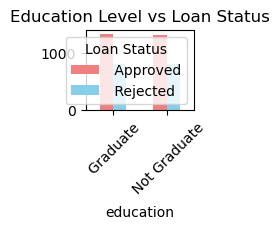

In [70]:
# 5. Education level distribution
plt.subplot(4, 4, 5)
education_crosstab = pd.crosstab(df['education'], df['loan_status'])
education_crosstab.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'skyblue'])
plt.title('Education Level vs Loan Status')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')

In [ ]:
# 6. Self-employed distribution
plt.subplot(4, 4, 6)
self_emp_crosstab = pd.crosstab(df['self_employed'], df['loan_status'])
self_emp_crosstab.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'skyblue'])
plt.title('Self-Employed vs Loan Status')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')

# 7. Number of dependents distribution
plt.subplot(4, 4, 7)
sns.countplot(data=df, x='no_of_dependents', hue='loan_status', palette=['lightcoral', 'skyblue'])
plt.title('Number of Dependents vs Loan Status')
plt.legend(title='Loan Status')

# 8. Loan term distribution
plt.subplot(4, 4, 8)
sns.countplot(data=df, x='loan_term', hue='loan_status', palette=['lightcoral', 'skyblue'])
plt.title('Loan Term vs Loan Status')
plt.legend(title='Loan Status')

# 9. Residential assets by loan status
plt.subplot(4, 4, 9)
sns.boxplot(data=df, x='loan_status', y='residential_assets_value', palette=['lightcoral', 'skyblue'])
plt.title('Residential Assets by Loan Status')
plt.xticks(rotation=45)

# 10. Commercial assets by loan status
plt.subplot(4, 4, 10)
sns.boxplot(data=df, x='loan_status', y='commercial_assets_value', palette=['lightcoral', 'skyblue'])
plt.title('Commercial Assets by Loan Status')
plt.xticks(rotation=45)

# 11. Luxury assets by loan status
plt.subplot(4, 4, 11)
sns.boxplot(data=df, x='loan_status', y='luxury_assets_value', palette=['lightcoral', 'skyblue'])
plt.title('Luxury Assets by Loan Status')
plt.xticks(rotation=45)

# 12. Bank assets by loan status
plt.subplot(4, 4, 12)
sns.boxplot(data=df, x='loan_status', y='bank_asset_value', palette=['lightcoral', 'skyblue'])
plt.title('Bank Assets by Loan Status')
plt.xticks(rotation=45)

# 13. Correlation matrix for numerical features
plt.subplot(4, 4, 13)
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Numerical Features Correlation')

# 14. Income vs Loan Amount scatter
plt.subplot(4, 4, 14)
colors = ['red' if status == 'Rejected' else 'green' for status in df['loan_status']]
plt.scatter(df['income_annum'], df['loan_amount'], c=colors, alpha=0.7)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Income vs Loan Amount')

# 15. CIBIL Score distribution
plt.subplot(4, 4, 15)
plt.hist(df[df['loan_status'] == 'Approved']['cibil_score'], alpha=0.7, 
         label='Approved', color='green', bins=10)
plt.hist(df[df['loan_status'] == 'Rejected']['cibil_score'], alpha=0.7, 
         label='Rejected', color='red', bins=10)
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.title('CIBIL Score Distribution')
plt.legend()

# 16. Asset values comparison
plt.subplot(4, 4, 16)
asset_means = df.groupby('loan_status')[['residential_assets_value', 'commercial_assets_value', 
                                        'luxury_assets_value', 'bank_asset_value']].mean()
asset_means.T.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'skyblue'])
plt.title('Average Asset Values by Status')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')

plt.tight_layout()
plt.show()


In [71]:
# Encode categorical variables for feature selection
print("\n" + "="*60)
print("DATA PREPROCESSING FOR FEATURE SELECTION")
print("="*60)

# Create a copy of the dataframe for processing
df_processed = df.copy()

# Encode categorical variables
le_education = LabelEncoder()
le_self_employed = LabelEncoder()
le_target = LabelEncoder()


DATA PREPROCESSING FOR FEATURE SELECTION


In [72]:
df_processed['education_encoded'] = le_education.fit_transform(df_processed['education'])
df_processed['self_employed_encoded'] = le_self_employed.fit_transform(df_processed['self_employed'])
df_processed['loan_status_encoded'] = le_target.fit_transform(df_processed['loan_status'])

print("Label encodings:")
print(f"Education: {dict(zip(le_education.classes_, le_education.transform(le_education.classes_)))}")
print(f"Self-employed: {dict(zip(le_self_employed.classes_, le_self_employed.transform(le_self_employed.classes_)))}")
print(f"Loan status: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

# Define original features only (no new feature creation)
original_features = ['no_of_dependents', 'education_encoded', 'self_employed_encoded', 
                    'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                    'residential_assets_value', 'commercial_assets_value', 
                    'luxury_assets_value', 'bank_asset_value']

X = df_processed[original_features]
y = df_processed['loan_status_encoded']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Features used: {original_features}")

Label encodings:
Education: {' Graduate': 0, ' Not Graduate': 1}
Self-employed: {' No': 0, ' Yes': 1}
Loan status: {' Approved': 0, ' Rejected': 1}

Feature matrix shape: (4269, 11)
Target vector shape: (4269,)
Features used: ['no_of_dependents', 'education_encoded', 'self_employed_encoded', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [73]:
# Feature Selection Analysis
print("\n" + "="*60)
print("COMPREHENSIVE FEATURE SELECTION ANALYSIS")
print("="*60)


COMPREHENSIVE FEATURE SELECTION ANALYSIS


In [74]:
# Method 1: Random Forest Feature Importance
print("\n1. RANDOM FOREST FEATURE IMPORTANCE:")
print("-" * 40)
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X, y)

feature_importance_rf = pd.DataFrame({
    'feature': original_features,
    'rf_importance': rf_selector.feature_importances_
}).sort_values('rf_importance', ascending=False)

print(feature_importance_rf)


1. RANDOM FOREST FEATURE IMPORTANCE:
----------------------------------------
                     feature  rf_importance
6                cibil_score       0.814133
5                  loan_term       0.061901
4                loan_amount       0.029112
3               income_annum       0.017869
9        luxury_assets_value       0.017108
7   residential_assets_value       0.016826
8    commercial_assets_value       0.015759
10          bank_asset_value       0.015547
0           no_of_dependents       0.007435
2      self_employed_encoded       0.002363
1          education_encoded       0.001948


In [75]:
# Method 2: Mutual Information
print("\n2. MUTUAL INFORMATION FEATURE SELECTION:")
print("-" * 40)
mi_scores = mutual_info_classif(X, y, random_state=42)
feature_importance_mi = pd.DataFrame({
    'feature': original_features,
    'mutual_info': mi_scores
}).sort_values('mutual_info', ascending=False)

print(feature_importance_mi)



2. MUTUAL INFORMATION FEATURE SELECTION:
----------------------------------------
                     feature  mutual_info
6                cibil_score     0.387358
8    commercial_assets_value     0.016358
5                  loan_term     0.013062
3               income_annum     0.010094
4                loan_amount     0.007661
1          education_encoded     0.007033
10          bank_asset_value     0.003498
2      self_employed_encoded     0.001014
7   residential_assets_value     0.000931
9        luxury_assets_value     0.000402
0           no_of_dependents     0.000000


In [76]:
# Method 3: ANOVA F-test
print("\n3. ANOVA F-TEST FEATURE SELECTION:")
print("-" * 40)
f_scores, p_values = f_classif(X, y)
feature_importance_f = pd.DataFrame({
    'feature': original_features,
    'f_score': f_scores,
    'p_value': p_values
}).sort_values('f_score', ascending=False)

print(feature_importance_f)


3. ANOVA F-TEST FEATURE SELECTION:
----------------------------------------
                     feature      f_score       p_value
6                cibil_score  6235.054591  0.000000e+00
5                  loan_term    55.225458  1.291185e-13
0           no_of_dependents     1.400600  2.366890e-01
4                loan_amount     1.113176  2.914523e-01
9        luxury_assets_value     1.020728  3.124036e-01
3               income_annum     0.984669  3.211051e-01
7   residential_assets_value     0.880877  3.480148e-01
8    commercial_assets_value     0.290152  5.901515e-01
10          bank_asset_value     0.196066  6.579377e-01
1          education_encoded     0.103202  7.480366e-01
2      self_employed_encoded     0.000506  9.820470e-01


In [77]:
# Method 4: Correlation with target
print("\n4. CORRELATION WITH TARGET:")
print("-" * 40)
correlations = X.corrwith(pd.Series(y, index=X.index)).abs()
feature_importance_corr = pd.DataFrame({
    'feature': original_features,
    'abs_correlation': correlations.values
}).sort_values('abs_correlation', ascending=False)

print(feature_importance_corr)


4. CORRELATION WITH TARGET:
----------------------------------------
                     feature  abs_correlation
6                cibil_score         0.770518
5                  loan_term         0.113036
0           no_of_dependents         0.018114
4                loan_amount         0.016150
9        luxury_assets_value         0.015465
3               income_annum         0.015189
7   residential_assets_value         0.014367
8    commercial_assets_value         0.008246
10          bank_asset_value         0.006778
1          education_encoded         0.004918
2      self_employed_encoded         0.000345



COMBINED FEATURE RANKING
Combined Feature Ranking (normalized scores):
                          rf_score  mi_score  f_score  corr_score  \
feature                                                             
cibil_score                 1.0000    1.0000   1.0000      1.0000   
loan_term                   0.0738    0.0337   0.0089      0.1463   
loan_amount                 0.0334    0.0198   0.0002      0.0205   
commercial_assets_value     0.0170    0.0422   0.0000      0.0103   
income_annum                0.0196    0.0261   0.0002      0.0193   
luxury_assets_value         0.0187    0.0010   0.0002      0.0196   
residential_assets_value    0.0183    0.0024   0.0001      0.0182   
bank_asset_value            0.0167    0.0090   0.0000      0.0084   
no_of_dependents            0.0068    0.0000   0.0002      0.0231   
education_encoded           0.0000    0.0182   0.0000      0.0059   
self_employed_encoded       0.0005    0.0026   0.0000      0.0000   

                          comb

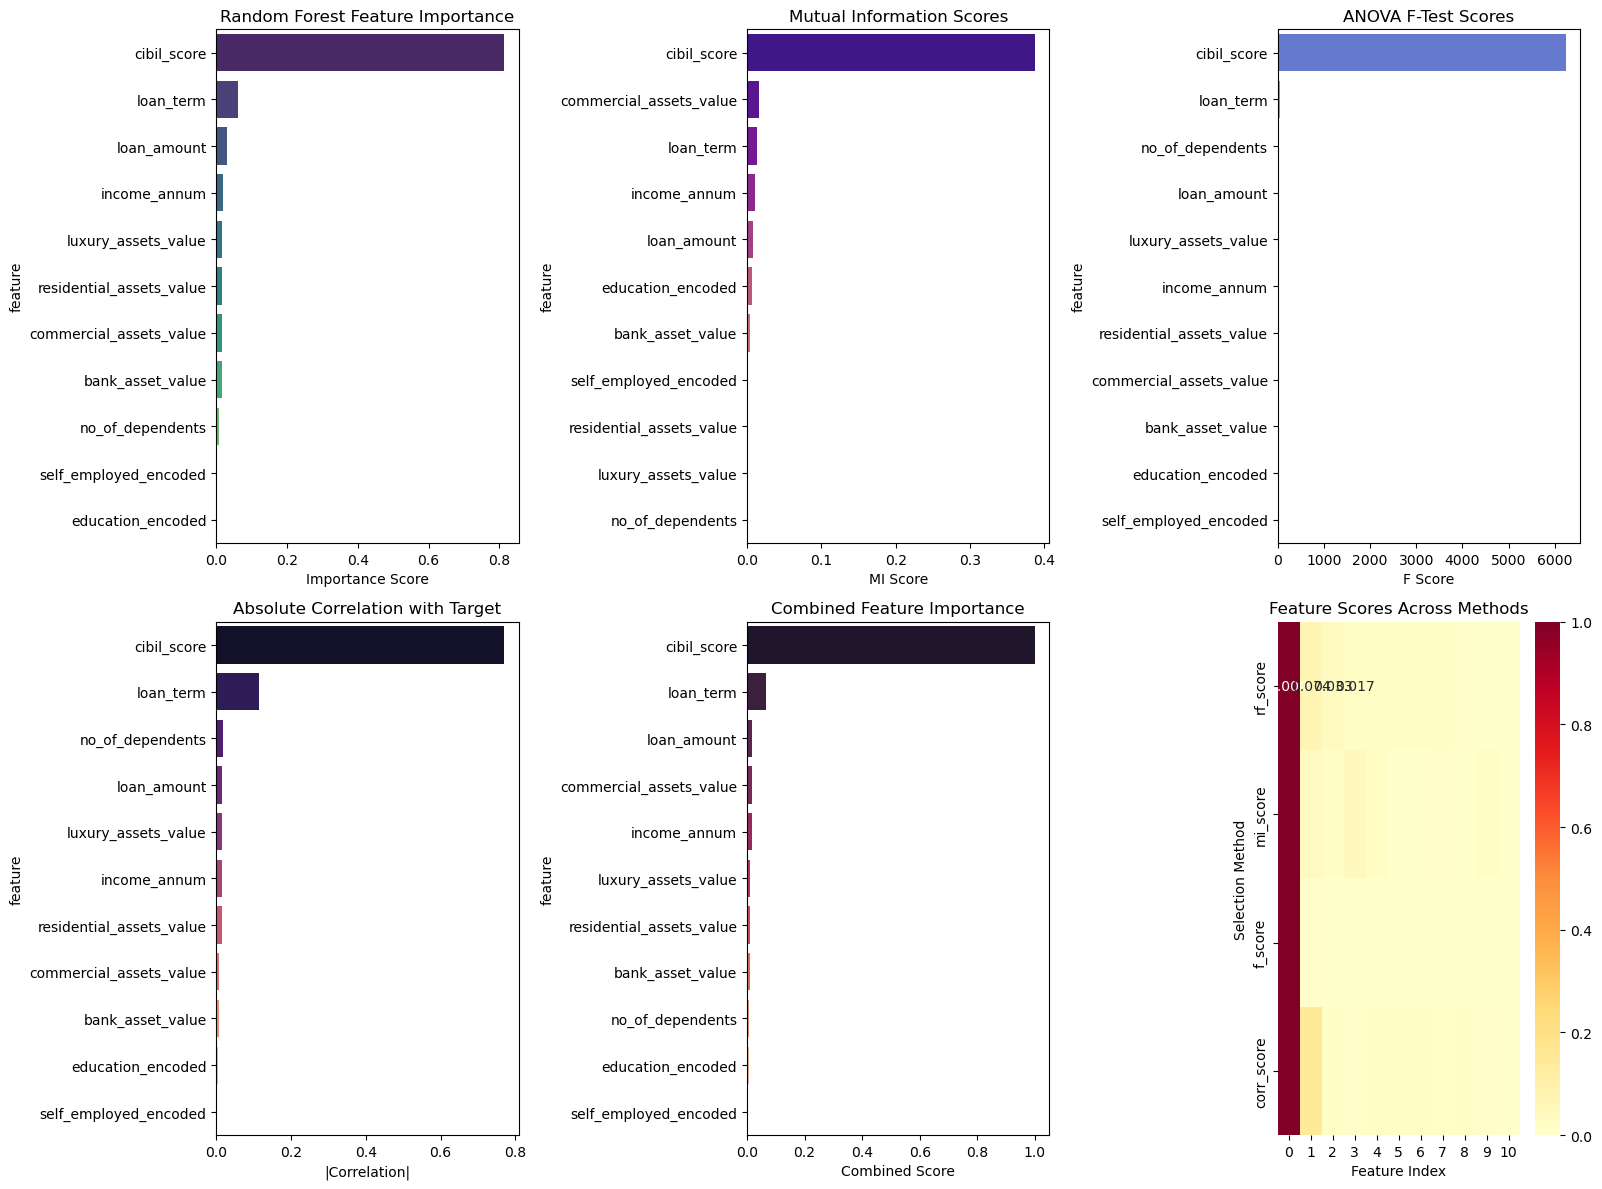


TOP 6 SELECTED FEATURES
1. cibil_score               (Combined Score: 1.0000)
2. loan_term                 (Combined Score: 0.0657)
3. loan_amount               (Combined Score: 0.0185)
4. commercial_assets_value   (Combined Score: 0.0174)
5. income_annum              (Combined Score: 0.0163)
6. luxury_assets_value       (Combined Score: 0.0099)


In [78]:
# Combine all feature selection methods
print("\n" + "="*60)
print("COMBINED FEATURE RANKING")
print("="*60)

# Normalize all scores to 0-1 range for fair comparison
def normalize_scores(scores):
    return (scores - scores.min()) / (scores.max() - scores.min())

# Create combined dataframe
combined_features = pd.DataFrame({'feature': original_features})

# Add normalized scores from each method
rf_norm = normalize_scores(feature_importance_rf.set_index('feature')['rf_importance'])
mi_norm = normalize_scores(feature_importance_mi.set_index('feature')['mutual_info'])
f_norm = normalize_scores(feature_importance_f.set_index('feature')['f_score'])
corr_norm = normalize_scores(feature_importance_corr.set_index('feature')['abs_correlation'])

combined_features = combined_features.set_index('feature')
combined_features['rf_score'] = rf_norm
combined_features['mi_score'] = mi_norm
combined_features['f_score'] = f_norm
combined_features['corr_score'] = corr_norm

# Calculate combined score (average of all methods)
combined_features['combined_score'] = combined_features.mean(axis=1)
combined_features = combined_features.sort_values('combined_score', ascending=False)

print("Combined Feature Ranking (normalized scores):")
print(combined_features.round(4))

# Visualize feature importance comparison
plt.figure(figsize=(16, 12))

# Random Forest importance
plt.subplot(2, 3, 1)
sns.barplot(data=feature_importance_rf, x='rf_importance', y='feature', palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')

# Mutual Information importance
plt.subplot(2, 3, 2)
sns.barplot(data=feature_importance_mi, x='mutual_info', y='feature', palette='plasma')
plt.title('Mutual Information Scores')
plt.xlabel('MI Score')

# ANOVA F-test importance
plt.subplot(2, 3, 3)
sns.barplot(data=feature_importance_f, x='f_score', y='feature', palette='coolwarm')
plt.title('ANOVA F-Test Scores')
plt.xlabel('F Score')

# Correlation with target
plt.subplot(2, 3, 4)
sns.barplot(data=feature_importance_corr, x='abs_correlation', y='feature', palette='magma')
plt.title('Absolute Correlation with Target')
plt.xlabel('|Correlation|')

# Combined importance ranking
plt.subplot(2, 3, 5)
combined_plot_data = combined_features.reset_index()
sns.barplot(data=combined_plot_data, x='combined_score', y='feature', palette='rocket')
plt.title('Combined Feature Importance')
plt.xlabel('Combined Score')

# Feature selection methods comparison
plt.subplot(2, 3, 6)
methods_comparison = combined_features[['rf_score', 'mi_score', 'f_score', 'corr_score']].T
methods_comparison.columns = range(len(original_features))
sns.heatmap(methods_comparison, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Feature Scores Across Methods')
plt.ylabel('Selection Method')
plt.xlabel('Feature Index')

plt.tight_layout()
plt.show()

# Select top features
top_k = 6  # Select top 6 features
top_features = combined_features.head(top_k).index.tolist()

print(f"\n" + "="*60)
print(f"TOP {top_k} SELECTED FEATURES")
print("="*60)
for i, feature in enumerate(top_features, 1):
    score = combined_features.loc[feature, 'combined_score']
    print(f"{i}. {feature:<25} (Combined Score: {score:.4f})")


In [79]:
# Model Training and Comparison with Selected Features
print(f"\n" + "="*60)
print("MODEL TRAINING WITH SELECTED FEATURES")
print("="*60)

# Prepare data with selected features
X_selected = X[top_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Selected features: {top_features}")


MODEL TRAINING WITH SELECTED FEATURES
Training set size: (3415, 6)
Test set size: (854, 6)
Selected features: ['cibil_score', 'loan_term', 'loan_amount', 'commercial_assets_value', 'income_annum', 'luxury_assets_value']


In [80]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\nOriginal training class distribution: {pd.Series(y_train).value_counts().to_dict()}")
print(f"After SMOTE class distribution: {pd.Series(y_train_balanced).value_counts().to_dict()}")

# Train models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
}

model_results = {}


Original training class distribution: {0: 2125, 1: 1290}
After SMOTE class distribution: {1: 2125, 0: 2125}



MODEL EVALUATION RESULTS

Logistic Regression:
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Approved       0.95      0.94      0.95       531
    Rejected       0.91      0.92      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854

AUC Score: 0.9753
Confusion Matrix:
[[501  30]
 [ 27 296]]

Decision Tree:
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Approved       0.99      0.97      0.98       531
    Rejected       0.95      0.99      0.97       323

    accuracy                           0.98       854
   macro avg       0.97      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

AUC Score: 0.9948
Confusion Matrix:
[[515  16]
 [  4 319]]

Random Forest:
--------------------

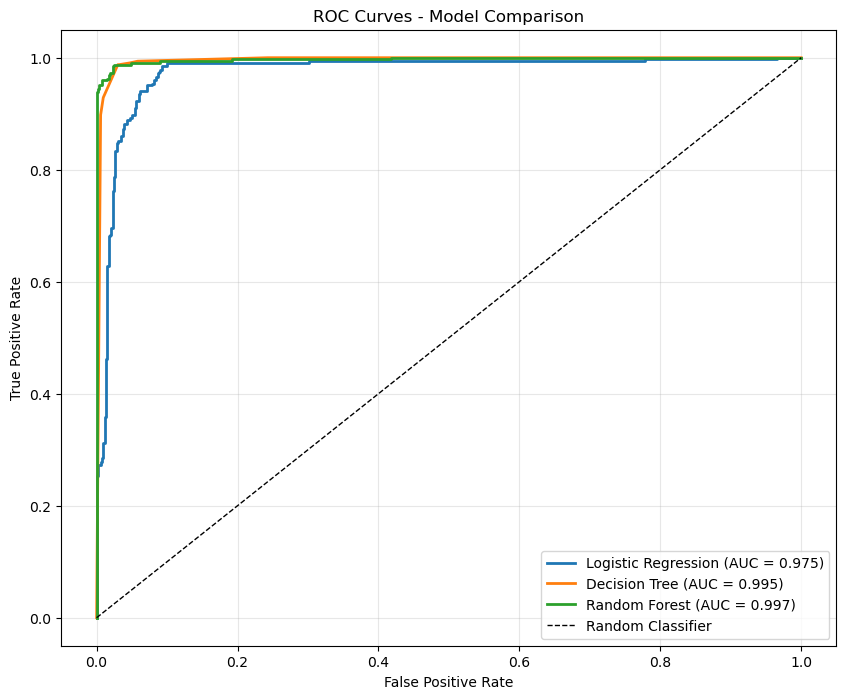

In [81]:
print(f"\n" + "="*60)
print("MODEL EVALUATION RESULTS")
print("="*60)

for name, model in models.items():
    print(f"\n{name}:")
    print("-" * 40)
    
    # Train model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le_target.classes_))
    
    # AUC Score
    if y_pred_proba is not None:
        auc = roc_auc_score(y_test, y_pred_proba)
        model_results[name] = auc
        print(f"AUC Score: {auc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")

# Plot ROC curves for comparison
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {model_results[name]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [82]:
# Final Summary
print(f"\n" + "="*70)
print("FINAL ANALYSIS SUMMARY")
print("="*70)

print(f"\n1. DATASET OVERVIEW:")
print(f"   • Total samples: {df.shape[0]}")
print(f"   • Original features: {len(original_features)}")
print(f"   • Target classes: {list(le_target.classes_)}")

print(f"\n2. TOP PERFORMING FEATURES (in order of importance):")
for i, feature in enumerate(top_features, 1):
    score = combined_features.loc[feature, 'combined_score']
    print(f"   {i}. {feature:<25} (Score: {score:.4f})")

print(f"\n3. FEATURE SELECTION INSIGHTS:")
print(f"   • Most important feature: {top_features[0]}")
print(f"   • Least important selected feature: {top_features[-1]}")
print(f"   • Features removed: {set(original_features) - set(top_features)}")

print(f"\n4. MODEL PERFORMANCE COMPARISON:")
if model_results:
    best_model = max(model_results, key=model_results.get)
    print(f"   • Best performing model: {best_model} (AUC: {model_results[best_model]:.4f})")
    for model, auc in sorted(model_results.items(), key=lambda x: x[1], reverse=True):
        print(f"   • {model}: AUC = {auc:.4f}")

print(f"\n5. RECOMMENDATIONS:")
print(f"   • Use the top {top_k} features for model training")
print(f"   • Address class imbalance with SMOTE or similar techniques")
print(f"   • Focus on improving data quality for top-ranked features")
print(f"   • Consider feature interactions for advanced modeling")
print(f"   • Validate results with cross-validation on full dataset")


FINAL ANALYSIS SUMMARY

1. DATASET OVERVIEW:
   • Total samples: 4269
   • Original features: 11
   • Target classes: [' Approved', ' Rejected']

2. TOP PERFORMING FEATURES (in order of importance):
   1. cibil_score               (Score: 1.0000)
   2. loan_term                 (Score: 0.0657)
   3. loan_amount               (Score: 0.0185)
   4. commercial_assets_value   (Score: 0.0174)
   5. income_annum              (Score: 0.0163)
   6. luxury_assets_value       (Score: 0.0099)

3. FEATURE SELECTION INSIGHTS:
   • Most important feature: cibil_score
   • Least important selected feature: luxury_assets_value
   • Features removed: {'bank_asset_value', 'no_of_dependents', 'residential_assets_value', 'education_encoded', 'self_employed_encoded'}

4. MODEL PERFORMANCE COMPARISON:
   • Best performing model: Random Forest (AUC: 0.9970)
   • Random Forest: AUC = 0.9970
   • Decision Tree: AUC = 0.9948
   • Logistic Regression: AUC = 0.9753

5. RECOMMENDATIONS:
   • Use the top 6 feature

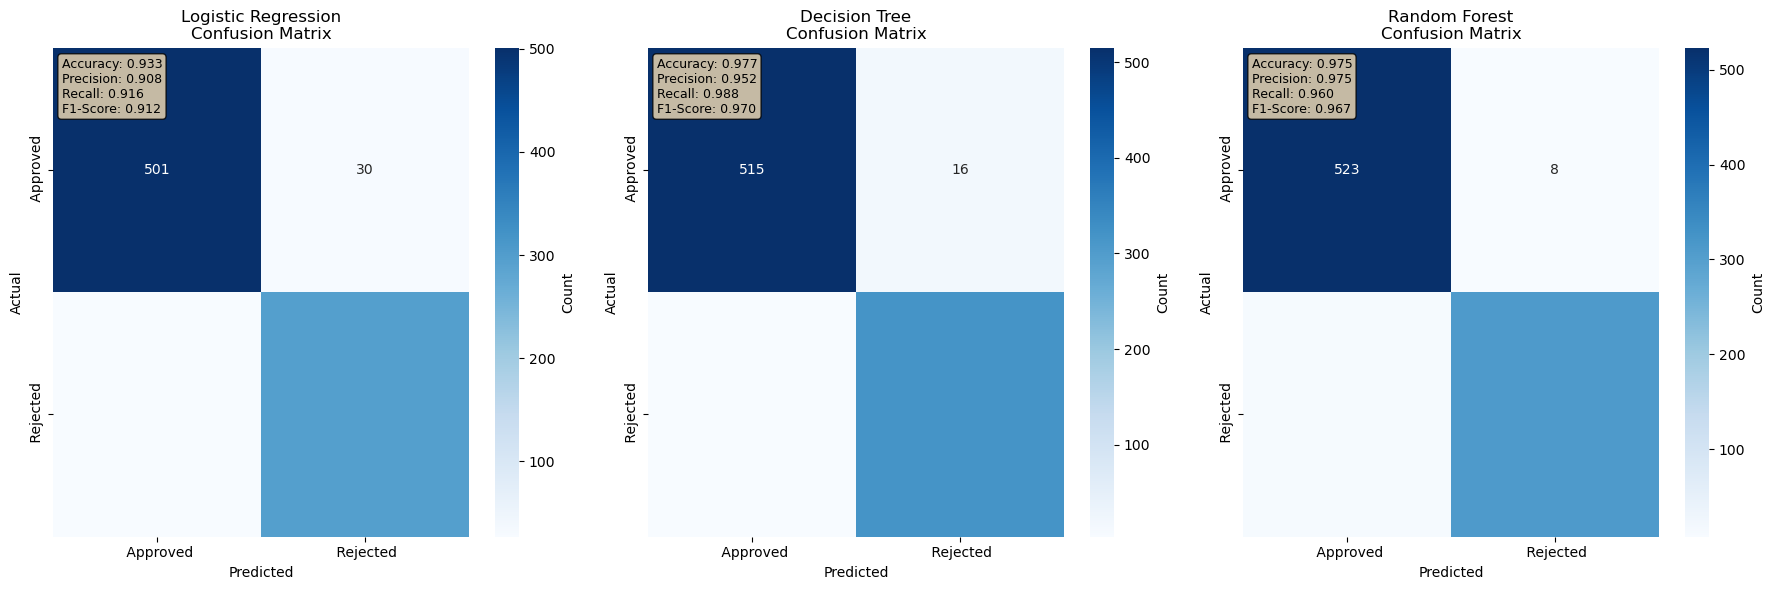


DETAILED CONFUSION MATRIX ANALYSIS

Logistic Regression:
----------------------------------------
Confusion Matrix:
                 Predicted
Actual     Approved   Rejected 
 Approved  501        30        
 Rejected  27         296       

Breakdown:
True Negatives (TN):  501 - Correctly predicted  Approved
False Positives (FP): 30 - Incorrectly predicted  Rejected
False Negatives (FN): 27 - Incorrectly predicted  Approved
True Positives (TP):  296 - Correctly predicted  Rejected

Detailed Metrics:
Accuracy:    0.9333 - Overall correctness
Precision:   0.9080 - Of predicted approvals, how many were correct
Recall:      0.9164 - Of actual approvals, how many were caught
Specificity: 0.9435 - Of actual rejections, how many were caught
F1-Score:    0.9122 - Harmonic mean of precision and recall

Decision Tree:
----------------------------------------
Confusion Matrix:
                 Predicted
Actual     Approved   Rejected 
 Approved  515        16        
 Rejected  4          319  

In [84]:
# Plot Confusion Matrices for all models
plt.figure(figsize=(18, 6))

model_predictions = {}
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test_scaled)
    model_predictions[name] = y_pred
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le_target.classes_, yticklabels=le_target.classes_,
                cbar_kws={'label': 'Count'})
    plt.title(f'{name}\nConfusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Add performance metrics as text
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Add text box with metrics
    textstr = f'Accuracy: {accuracy:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nF1-Score: {f1:.3f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=9,
             verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Detailed confusion matrix analysis
print(f"\n" + "="*60)
print("DETAILED CONFUSION MATRIX ANALYSIS")
print("="*60)

for name, y_pred in model_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name}:")
    print("-" * 40)
    print("Confusion Matrix:")
    print(f"                 Predicted")
    print(f"Actual    {le_target.classes_[0]:<10} {le_target.classes_[1]:<10}")
    for i, actual_class in enumerate(le_target.classes_):
        print(f"{actual_class:<10} {cm[i,0]:<10} {cm[i,1]:<10}")
    
    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
        print(f"\nBreakdown:")
        print(f"True Negatives (TN):  {tn} - Correctly predicted {le_target.classes_[0]}")
        print(f"False Positives (FP): {fp} - Incorrectly predicted {le_target.classes_[1]}")
        print(f"False Negatives (FN): {fn} - Incorrectly predicted {le_target.classes_[0]}")
        print(f"True Positives (TP):  {tp} - Correctly predicted {le_target.classes_[1]}")
        
        # Calculate metrics
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        print(f"\nDetailed Metrics:")
        print(f"Accuracy:    {accuracy:.4f} - Overall correctness")
        print(f"Precision:   {precision:.4f} - Of predicted approvals, how many were correct")
        print(f"Recall:      {recall:.4f} - Of actual approvals, how many were caught")
        print(f"Specificity: {specificity:.4f} - Of actual rejections, how many were caught")
        print(f"F1-Score:    {f1:.4f} - Harmonic mean of precision and recall")
